## 웹 IDS/시스템 로그 시계열 분석하기

- - - 

### 01. 시계열 데이터
- **시계열(time series)**
  * 일정 시간 간격으로 배치된 데이터들의 수열
  * 시간에 종속적으로 측정된 모든 데이터들은 시계열 데이터 
    예) 종합 주가지수, 매일 다른 유가 변동사항, 환율 등
  * 시계열 데이터가 꼭 일정 시간 간격으로 주어지는 것이 아님
  
  
- 시계열 분석(time series analysis)
 : 시계열을 해석하고 이해(어떤 규칙을 가지는가)하는 데 쓰이는 여러가지 방법을 연구하는 분야, 미래를 예측하는 데에 중요한 도구
 
- 시계열 예측(time series prediction)
 : 주어진 시계열을 통해서 수학적인 모델을 만들어서 미래를 예측
 예) 이상 탐지, 금융 시장에서의 주가 예측 등에서 사용

- 보안에서의 분석할 로그 데이터들은 시간에 종속적이기 때문에 시계열 데이터 분석 방식을 주로 이용한다.
- - -

### 02. 시계열 데이터 분석

1. 기본 시계열 빈도
* 시계열 데이터만의 종류 및 표현들이 있다.

![](https://images.velog.io/images/hm1lee/post/55ed95a7-1c24-4ea1-bcee-4aaca1ffb1ce/image.png)

2. 예제 시리즈 생성
- datetime 함수를 사용하여 datetime 데이터 형식으로 변환
- 날짜 데이터를 index로 전달하여 Series 생성

![](https://images.velog.io/images/hm1lee/post/ac5abb1a-0ac5-47c3-8d2f-91fe613d2c45/image.png)

3. 시리즈 시계열 데이터 인덱싱
- se 시간별 인덱싱 문법은 일반적인 인덱싱과 유사함
- 문자열로 datatime 형식으로 삽입
- 'yyyy-mm-dd' or 'yyyy/mm/dd'

![](https://images.velog.io/images/hm1lee/post/640aa885-f10e-4e02-8f4f-651ba1c6ff5e/image.png)

4. 예제 데이터프레임 생성
- pandas의 data_range() 함수를 사용하여 날짜 데이터를 생성
: freq의 'D'는 날짜 별, peridos는 기간 길이를 명시(아래에서는 365"일"을 생성)

In [8]:
# 예제 데이터 프레임 생성

import pandas as pd
import numpy as np

dt = pd.date_range('2021-1-1', periods = 365, freq = 'D')
arr1 = np.random.randn(365).cumsum() // 누적한 배열
arr2 = np.random.randn(365).cumsum()
arr3 = np.random.randn(365).cumsum()

df = pd.DataFrame(arr1, index=dt, columns = ["arr1"])
df["arr2"] = arr2
df["arr3"] = arr3
df

,arr1,arr2,arr3
2021-01-01,0.978418,1.299624,1.492235
2021-01-02,0.525339,-1.042709,1.799188
2021-01-03,0.777031,-2.032785,2.738465
2021-01-04,0.385989,-2.157604,3.099435
2021-01-05,0.708058,-3.155794,2.948886
...,...,...,...
2021-12-27,-11.844699,-10.647979,13.442545
2021-12-28,-11.250018,-9.361534,13.247305
2021-12-29,-10.659076,-10.881213,12.169070
2021-12-30,-12.420797,-11.118663,10.523242


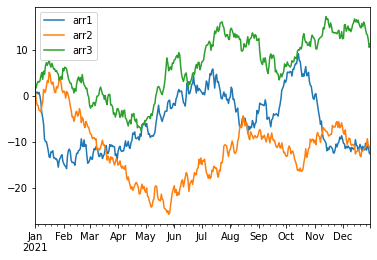

In [9]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

- 2021년 01월에 대해서 인덱싱하여 그래프 작성

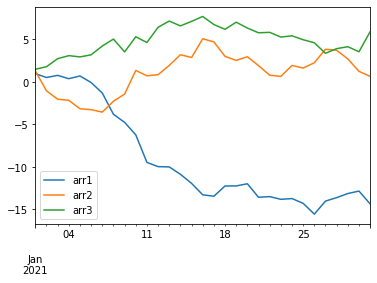

In [10]:
df['2021-01'].plot()
plt.show()

- - -

### 03. 리샘플링

![](https://images.velog.io/images/hm1lee/post/9eeef297-d2a1-46fe-92c1-2e15df880a57/image.png)


- **리샘플링은 시계열의 빈도를 변환하는 과정**
  * 원하는 데이터의 해상도를 유연하게 정의 할 수있는 중요한 기술
  * 예) 5분 데이터를 1분 데이터로 변환하는 것처럼 빈도를 높이기
 
 
 - 리샘플링의 종류
   1. 다운샘플링 : 상위 빈도의 데이터 -> 하위 빈도로 집계
   2. 업샘플링 : 하위 빈도의 데이터 -> 상위 빈도 집계
   3. 여기에 속하지 않는 동등한 빈도의 리샘플도 존재함 (예. 월말 집계 -> 월초 집계로)


 - Pandas의 DataFrame, Series는 빈도 변환에 관련된 모든 작업에서 유용하게 사용하는 **resample 함수**를 가짐
 
(참고 : https://ichi.pro/ko/deiteo-bunseog-sigyeyeol-pandas-eseo-lisaempeulling-279137666457008)




* resample() 함수
```
 DataFrame.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind='None' loffset=None, limit=None, base=0, on=None, level=None)

```
![](https://images.velog.io/images/hm1lee/post/d95fe88f-086c-4705-913c-a1094168d857/image.png)



- - - 

1. 리샘플링 - Series resample
  - 2017년 1월 1일부터 시작하는 일 단위의 365개의 랜덤 시리즈 생성
![](https://images.velog.io/images/hm1lee/post/15553d18-0b95-415e-a704-188018c3e850/image.png)

  - 시리즈 월별, 일별 리샘플링 : 주로 합이나 평균을 계산하여 리샘플링
  1. se.resample('D').mean() : 일별로 평균 리샘플링
  2. se.resample('D').sum() : 일별로 합계 리샘플링
  
 ![](https://images.velog.io/images/hm1lee/post/ba22e79f-4bf1-442a-82b5-827c6242b525/image.png)
 
   
  3. se.resample('M').mean() : 월별로 평균 리샘플링
  4. se.resample('M').sum() : 월별로 합계 
  
 ![](https://images.velog.io/images/hm1lee/post/22913a93-abca-4cc3-9b31-37de0da0d2d0/image.png)
   * resample 데이터 plot()으로 시각화하여 확인
![](https://images.velog.io/images/hm1lee/post/a2df249f-8cef-4622-998e-2b0f16c6a528/image.png)


2. 리샘플링 - DataFrame resample

In [15]:
import pandas as pd
import numpy as np

dt = pd.date_range('2017-1-1', periods = 365, freq = 'D')
arr1 = np.random.randn(365).cumsum()
arr2 = np.random.randn(365).cumsum()
arr3 = np.random.randn(365).cumsum()

arr123 = np.column_stack([arr1,arr2,arr3])
df = pd.DataFrame(arr123, index=dt, columns = ["arr1","arr2","arr3"])
df

,arr1,arr2,arr3
2017-01-01,-0.456576,0.007537,1.011632
2017-01-02,0.022603,-0.694202,2.018444
2017-01-03,1.785138,0.441636,3.191056
2017-01-04,1.445076,1.035590,2.510013
2017-01-05,0.535256,0.220127,2.360256
...,...,...,...
2017-12-27,12.302892,-30.808319,11.205713
2017-12-28,12.276795,-30.076091,10.619333
2017-12-29,12.965585,-28.612769,9.243679
2017-12-30,13.552623,-28.954443,8.222786


In [16]:
df_M_mean = df.resample('M', kind='period').mean()
df_M_mean

,arr1,arr2,arr3
2017-01,0.730842,5.593609,5.764391
2017-02,-0.451913,6.495625,13.923352
2017-03,0.832204,0.844441,6.146540
2017-04,4.982107,2.230830,5.392070
2017-05,0.396749,0.800108,6.280232
2017-06,1.881184,-3.121048,3.334724
2017-07,2.582939,-6.790651,6.780502
2017-08,1.972423,-9.512514,8.477512
2017-09,4.629978,-14.492393,11.501764
2017-10,10.826779,-21.985380,20.271555


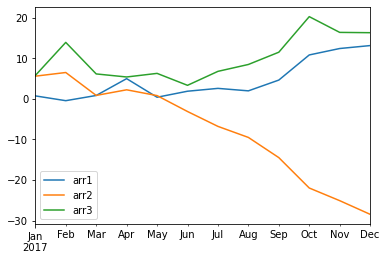

In [17]:
df_M_mean.plot()
plt.show()